# Set environment

In [1]:
source("pilot_config.R")

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following o

Recall that we have created the hts-pilot-2018.RData in tutorial one and HTS-Pilot-Annotated-STAR-counts.RData in tutorial two.
```
scratch
└── analysis_out
    ├── out  
    │   └── hts-pilot-2018.RData  
    |   └── HTS-Pilot-Annotated-STAR-counts.RData
    └── img  
```

# Read in data

In [2]:
attach(file.path(OUTDIR, "HTS-Pilot-Annotated-STAR-counts.RData"))

### Annotated mapping results

In [3]:
head(annomapres0)

Label,Strain,Media,experiment_person,libprep_person,enrichment_method,prob.gene,prob.nofeat,prob.unique,depth
1_MA_J,H99,YPD,expA,prepB,MA,0.9641456,0.008161923,0.9723075,2493464
1_RZ_J,H99,YPD,expA,prepB,RZ,0.6689001,0.217095621,0.8859957,3541358
10_MA_C,mar1d,YPD,expA,prepA,MA,0.9618651,0.009818573,0.9716837,3282785
10_RZ_C,mar1d,YPD,expA,prepA,RZ,0.7497438,0.200651686,0.9503955,1742594
11_MA_J,mar1d,YPD,expA,prepB,MA,0.9669597,0.008717898,0.9756776,2062181
11_RZ_J,mar1d,YPD,expA,prepB,RZ,0.7030020,0.195547151,0.8985491,2621913


### Annotated count matrix

In [4]:
head(annogenecnts0)

gene,1_MA_J,1_RZ_J,10_MA_C,10_RZ_C,11_MA_J,11_RZ_J,12_MA_P,12_RZ_P,13_MA_J,⋯,4_RZ_P,4_TOT_P,40_MA_J,40_RZ_J,45_MA_P,45_RZ_P,47_MA_P,47_RZ_P,9_MA_C,9_RZ_C
CNAG_00001,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CNAG_00002,265,204,269,76,130,92,205,64,308,⋯,51,13,519,235,410,122,534,112,217,106
CNAG_00003,112,40,171,24,124,18,150,34,221,⋯,11,8,218,53,232,46,240,41,128,35
CNAG_00004,301,207,407,141,272,179,351,156,533,⋯,50,36,719,442,518,238,622,277,310,234
CNAG_00005,114,125,50,25,38,32,38,12,202,⋯,25,14,344,270,202,81,256,118,45,40
CNAG_00006,1904,1295,3571,1015,2073,1327,3003,926,1660,⋯,319,110,3002,1535,3934,1090,4966,1132,3313,1509


# DESeq object

Generate count matrix for RZ enrichment method

In [5]:
### Prepare columnData (DataFrameand countData (matrix object)
### Select samples from RZ
annomapres0 %>%
    dplyr::filter(enrichment_method == "RZ")  %>%
    DataFrame ->
    columnData
rownames(columnData) <- columnData[["Label"]]

annogenecnts0 %>%
    dplyr::select(dput(as.character(c("gene",columnData[["Label"]])))) %>%
    as.data.frame %>%
    column_to_rownames("gene") %>%
    as.matrix ->
    countData

c("gene", "1_RZ_J", "10_RZ_C", "11_RZ_J", "12_RZ_P", "13_RZ_J", 
"14_RZ_C", "15_RZ_C", "16_RZ_P", "2_RZ_C", "21_RZ_C", "22_RZ_C", 
"23_RZ_J", "24_RZ_J", "26_RZ_C", "27_RZ_P", "3_RZ_J", "35_RZ_P", 
"36_RZ_J", "38_RZ_P", "4_RZ_P", "40_RZ_J", "45_RZ_P", "47_RZ_P", 
"9_RZ_C")


In [6]:
head(countData)

,1_RZ_J,10_RZ_C,11_RZ_J,12_RZ_P,13_RZ_J,14_RZ_C,15_RZ_C,16_RZ_P,2_RZ_C,21_RZ_C,⋯,27_RZ_P,3_RZ_J,35_RZ_P,36_RZ_J,38_RZ_P,4_RZ_P,40_RZ_J,45_RZ_P,47_RZ_P,9_RZ_C
CNAG_00001,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CNAG_00002,204,76,92,64,230,182,200,129,168,124,⋯,43,107,150,109,95,51,235,122,112,106
CNAG_00003,40,24,18,34,56,53,54,40,40,41,⋯,9,24,26,43,43,11,53,46,41,35
CNAG_00004,207,141,179,156,396,363,416,254,184,312,⋯,56,140,224,202,166,50,442,238,277,234
CNAG_00005,125,25,32,12,201,179,187,124,121,122,⋯,22,67,154,56,82,25,270,81,118,40
CNAG_00006,1295,1015,1327,926,1143,879,1058,619,1060,1103,⋯,398,827,869,1877,627,319,1535,1090,1132,1509


Import count matrix as a DESeq object

In [7]:
### Make DESeq object on the basis of the counts
dds <- DESeqDataSetFromMatrix(countData, columnData, ~ Media + Strain + Media:Strain)
### Estimate Size Factors
dds <- estimateSizeFactors(dds)
### Estimate Dispersion parameters (for each gene)
dds <- estimateDispersions(dds)
### Fit NB MLE model
dds <- DESeq(dds)
### Rlog "normalized" expressions
rld <- rlog(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [8]:
### Show top 10 hits
results(dds, tidy = TRUE) %>% arrange(pvalue) %>% head(10)

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CNAG_04307,490.86196,4.023118,0.29759976,13.518553,1.215429e-41,9.552054e-38
CNAG_05459,636.02477,1.144042,0.09994094,11.447183,2.429119e-30,9.545224e-27
CNAG_03621,1821.27006,-1.064434,0.10659585,-9.985699,1.760551e-23,4.612056e-20
CNAG_00600,848.44047,1.142434,0.11598632,9.849729,6.872879e-23,1.350349e-19
CNAG_04585,812.31911,-4.040747,0.41261597,-9.792997,1.206656e-22,1.896623e-19
CNAG_03735,521.96604,1.634231,0.16755798,9.753228,1.786944e-22,2.340599e-19
CNAG_07862,85.91321,-2.608844,0.26841617,-9.719401,2.492446e-22,2.798304e-19
CNAG_02733,15.32034,-4.023640,0.41731949,-9.641629,5.333480e-22,5.239478e-19
CNAG_06517,850.38128,1.871991,0.19539060,9.580764,9.632973e-22,8.411726e-19
CNAG_00399,213.68536,-2.146601,0.22469243,-9.553507,1.253786e-21,9.853503e-19


# Gene expression value in different media and strain

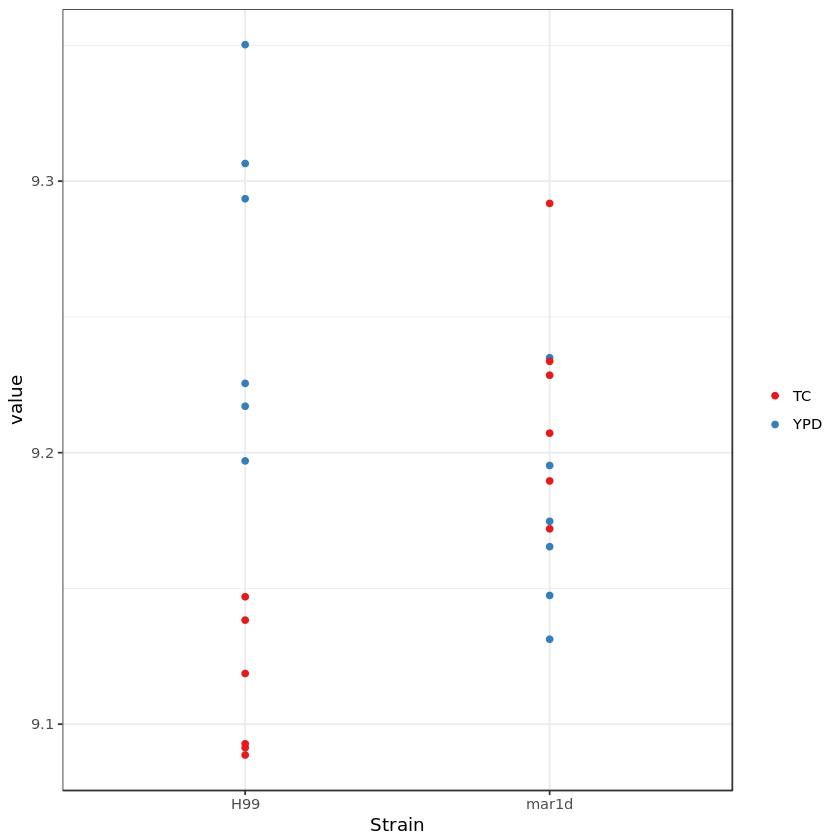

In [9]:
### A function for exploring interactions
myinteractplot <- function(mydds, geneid) {
    # plot gene expression value in different media and strain
    #
    # Args:
    #   mydds (DESeqTransform object): your input DESeq object
    #   geneid (Charater): the second count data
    #
    # Returns:
    #   (ggplot object) the final plot
    assay(mydds) %>%
        as_tibble(rownames = "gene") %>%
        filter(gene == geneid) %>%
        gather(Label, value, -gene) %>%
        select(-gene) -> 
        genedat
    
    colData(mydds) %>%
        as.data.frame %>%
        as_tibble %>%
        full_join(genedat, by="Label") -> genedat

    mygeom  <-  geom_point()
    mypal   <- scale_colour_manual(name = "",  values = brewer.pal(3, "Set1"))
    mytheme <- theme_bw()

    ggplot(genedat, aes(x = Strain, y = value, color = Media)) + mygeom + mytheme + mypal
}

myinteractplot(rld, "CNAG_05845")

# Dendrogram of Samples in Hierarchical Clustering

Create Dendrogram of samples using hierarchical clustering

In [10]:
assay(rld) %>%
    t() %>%
    dist %>%
    hclust(method = "complete") %>%
    as.dendrogram ->
    mydend

Customize function to plot dendrogram showing the sample annotations

In [11]:
dendplot <- function(mydend, columndata, labvar, colvar, pchvar) {
    # plot dendrogram
    #
    # Args:
    #   mydend (Dendrogram): your input DESeq object
    #   columndata (DataFrame): the second count data
    #   labvar (Character): variable that show in label
    #   colvar (Character): variable that define color
    #   pchvar (Character): variable that define shape of points
    #
    # Returns:
    #   (Dendrogram) final plot of dendrogram
    cols   <- factor(columndata[[colvar]][order.dendrogram(mydend)])
    collab <- brewer.pal(max(3, nlevels(cols)), "Set1")[cols]
    pchs   <- factor(columndata[[pchvar]][order.dendrogram(mydend)])
    pchlab <- seq_len(nlevels(pchs))[pchs]
    lablab <- columndata[[labvar]][order.dendrogram(mydend)]
    
    mydend %>% 
        set("labels_cex", 1) %>% 
        set("labels_col", collab) %>%
        set("leaves_pch", pchlab) %>%
        set("labels",     lablab)
}

### Dendrogram of samples: showing strain of each sample

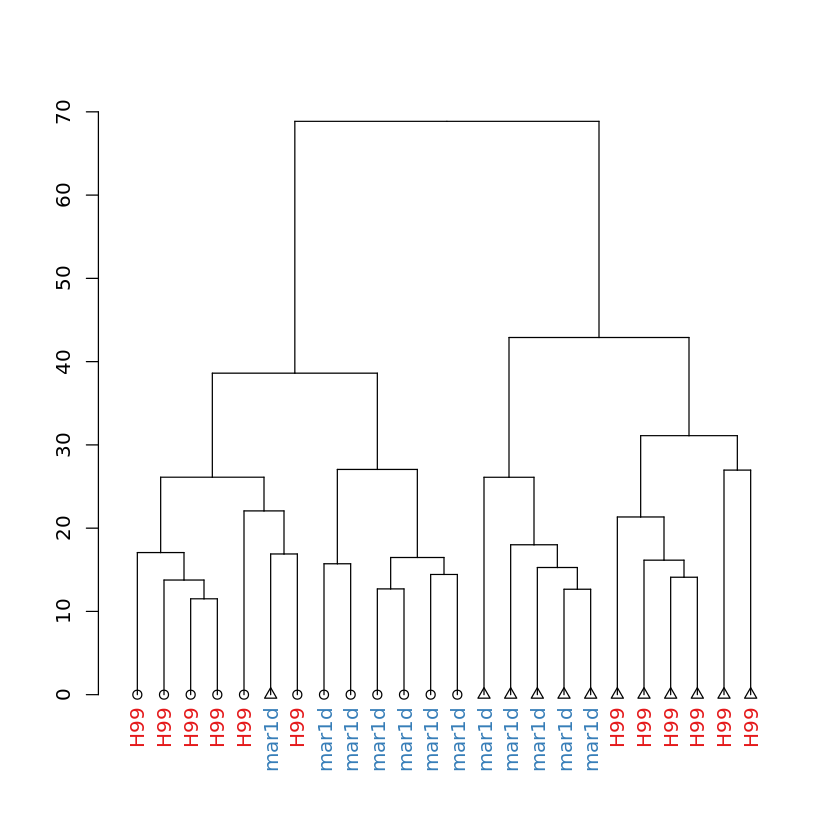

In [12]:
dendplot(mydend, columnData, "Strain", "Strain", "Media") %>% plot

### Dendrogram of samples: showing media of each sample

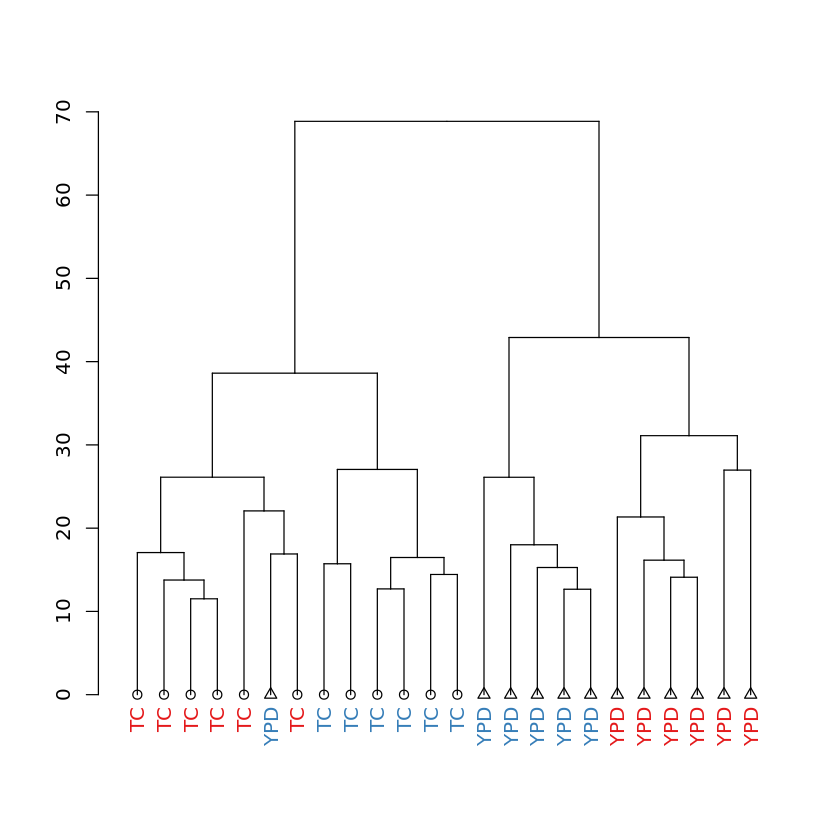

In [13]:
dendplot(mydend, columnData, "Media", "Strain", "Media") %>% plot

### Dendrogram of samples: showing sample names of each sample

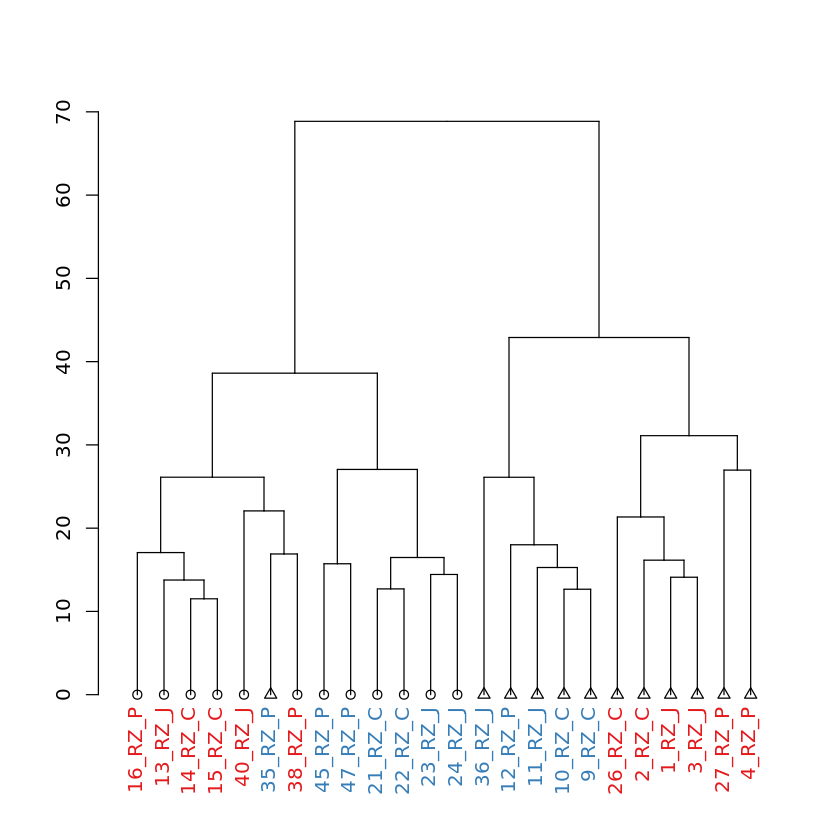

In [14]:
dendplot(mydend, columnData, "Label", "Strain", "Media") %>% plot

Store the plot into a pdf

In [15]:
pdf(file.path(IMGDIR, "dendrogram.pdf"))
dendplot(mydend, columnData, "Strain", "Strain", "Media") %>% plot
dendplot(mydend, columnData, "Media", "Strain", "Media") %>% plot
dendplot(mydend, columnData, "Label", "Strain", "Media") %>% plot
graphics.off()